# Set up

In [26]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress
import datetime as dt 
import seaborn as sns

plt.rcParams['axes.facecolor'] = 'black'
plt.rc('axes', axisbelow=True)

In [27]:
main_data = pd.read_csv("Resources/netflix_titles.csv")
rating_data = pd.read_csv("Resources/Netflix reelgood ratings.csv")

In [28]:
#Drop unnecessary columns
cleaned_main_data = main_data.drop(['description', 'duration','director','cast'], axis = 1)
cleaned_main_data

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas
...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,"International TV Shows, Reality TV"


In [29]:
cleaned_rating_data = rating_data[["movie", "imdb_rating"]].dropna()
cleaned_rating_data = cleaned_rating_data.rename(columns={'movie': 'title'})
cleaned_rating_data

,title,imdb_rating
0,Back to the Future,8.5
1,One Flew Over the Cuckoo's Nest,8.7
2,Spider-Man: Into the Spider-Verse,8.4
3,Django Unchained,8.4
4,Eternal Sunshine of the Spotless Mind,8.3
...,...,...
1195,I Am Not an Easy Man,6.3
1196,Radio Rebel,5.9
1197,Umrika,6.6
1198,Semana Santa,6.0


In [30]:
merged_df = pd.merge(cleaned_rating_data, cleaned_main_data, on='title')
merged_df

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in
0,Spider-Man: Into the Spider-Verse,8.4,s5755,Movie,United States,"June 26, 2019",2018,PG,"Action & Adventure, Comedies"
1,Django Unchained,8.4,s1788,Movie,United States,"April 25, 2020",2012,R,"Action & Adventure, Dramas"
2,Taxi Driver,8.3,s5995,Movie,United States,"April 1, 2020",1976,R,"Classic Movies, Dramas, Thrillers"
3,Pan's Labyrinth,8.2,s4750,Movie,"Mexico, Spain","January 1, 2020",2006,R,"Dramas, International Movies, Sci-Fi & Fantasy"
4,Spotlight,8.1,s5770,Movie,United States,"July 22, 2020",2015,R,"Dramas, Independent Movies"
...,...,...,...,...,...,...,...,...,...
994,Seal Team Six: The Raid on Osama Bin Laden,5.7,s5448,Movie,United States,"January 1, 2020",2012,TV-MA,Action & Adventure
995,Radio Rebel,5.9,s5058,Movie,United States,"March 1, 2019",2012,TV-G,"Children & Family Movies, Comedies"
996,Umrika,6.6,s7311,Movie,India,"October 1, 2016",2015,TV-MA,"Dramas, Independent Movies, International Movies"
997,Semana Santa,6.0,s5491,Movie,Mexico,"January 31, 2017",2015,TV-MA,"Dramas, International Movies"


# Country

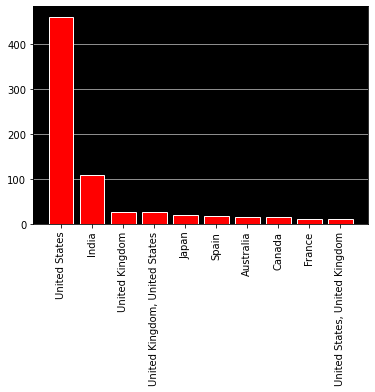

In [33]:
# JUST LEAVE IT
# Pull out the list of genres
country_index_list = merged_df['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = merged_df['country'].value_counts().tolist()

plt.bar(country_index_list[0:10], country_value_list[0:10], color='red', edgecolor='snow')
plt.grid(axis = 'y')
plt.xticks(rotation = 90)
plt.show()

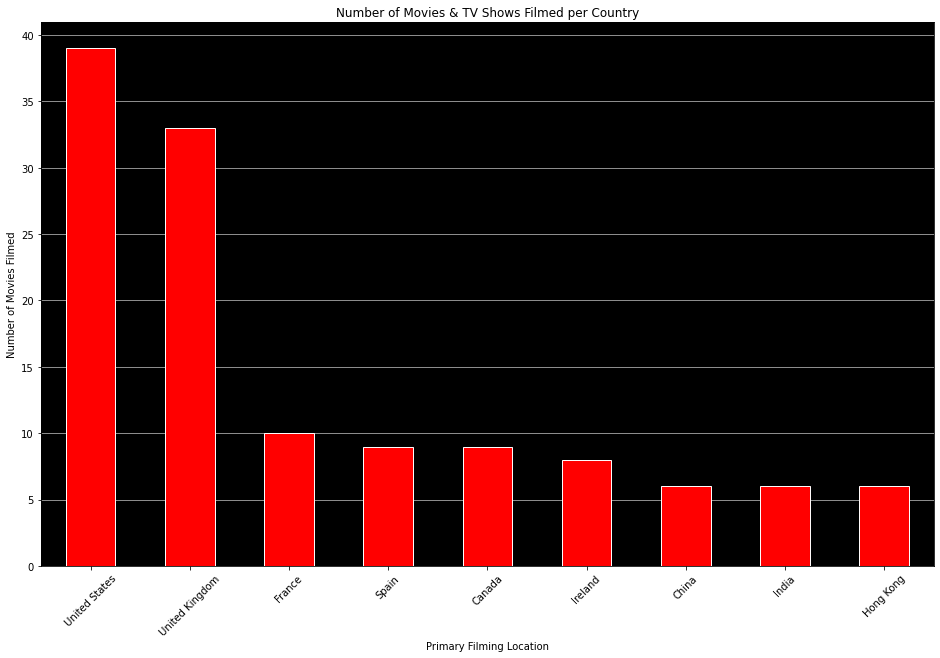

In [42]:
# OPTION FIRST

# Pull out the list of genres
country_index_list = merged_df['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = merged_df['country'].value_counts().tolist()

counter = 0
country_dict = {}
for countries in country_index_list:
    country = countries.split(",")[0]
    if country not in country_dict.keys():
        country_dict[country] = 0
    country_dict[country] += 1
    
key = list(country_dict.keys())
value = list(country_dict.values())
df_dict = {'countries': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

countries_df = pd.DataFrame(df_dict)
renamed_countries_df = countries_df.set_index('countries')
sorted_countries_df = renamed_countries_df.sort_values(by='values', ascending=False)
top_countries_df = sorted_countries_df.loc[sorted_countries_df['values'] > 5]
top_countries_df.plot(kind='bar', figsize=(16,10),color='red', edgecolor='snow',legend=None)
plt.title("Number of Movies & TV Shows Filmed per Country")
plt.xlabel("Primary Filming Location")
plt.ylabel("Number of Movies Filmed")
plt.grid(axis = 'y')
plt.xticks(rotation = 45)

plt.show()

# Movies & TV Shows

In [36]:
movie_df = merged_df.loc[merged_df['type'] == 'Movie']
tvshow_df = merged_df.loc[merged_df['type'] == 'TV Show']

## Movies Genres

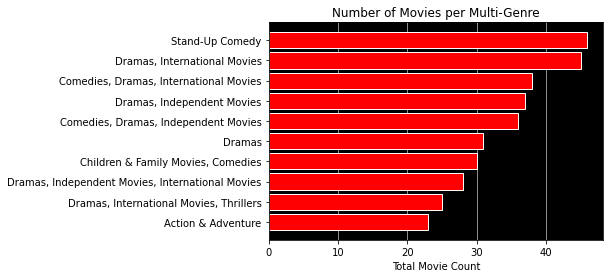

In [38]:
# LEAVE IT
# OPTION TOTAL

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

plt.barh(movie_genres_index_list[10:0:-1], movie_genres_value_list[10:0:-1], color='red', edgecolor='snow')
plt.xticks(rotation = 0)
plt.title("Number of Movies per Multi-Genre")
plt.xlabel("Total Movie Count")
plt.grid(axis = 'x')
plt.show()

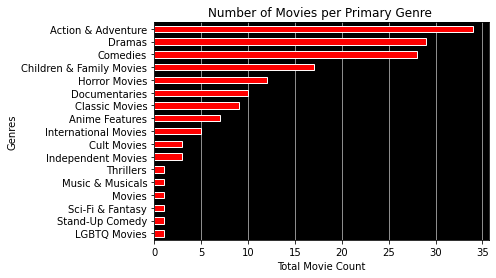

In [39]:
# OPTION FIRST

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

counter = 0
genres_dict = {}
for genres in movie_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1
    counter += 1
# genres_dict
# for (key, value) in genres_dict.items():
#     genres_dict[key] = [value]
    
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh',color='red', edgecolor='snow', legend=None)
plt.title("Number of Movies per Primary Genre ")
plt.xlabel("Total Movie Count")
plt.grid(axis = 'x')
plt.ylabel("Genres")
plt.show()

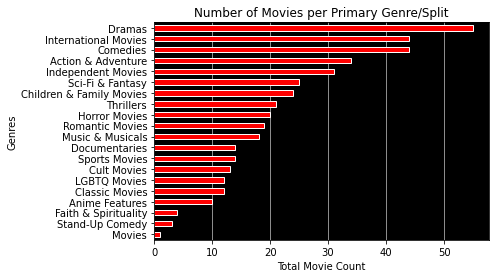

In [40]:
# LEAVE IT
# OPTION SPLIT

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()


# 
counter = 0
genres_dict = {}

for genres_row in movie_genres_index_list:
    genres = genres_row.split(", ")

    for genre in genres:
        if genre not in genres_dict.keys():
            genres_dict[genre] = 0
        genres_dict[genre] += 1
    
    

key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}

total = 0
for (key, value) in genres_dict.items():
    total += value
total
# counter

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', color='red', edgecolor='snow', legend=None)
plt.title("Number of Movies per Primary Genre/Split")
plt.xlabel("Total Movie Count")
plt.ylabel("Genres")
plt.grid(axis = 'x')
plt.show()

## TV Shows Genres

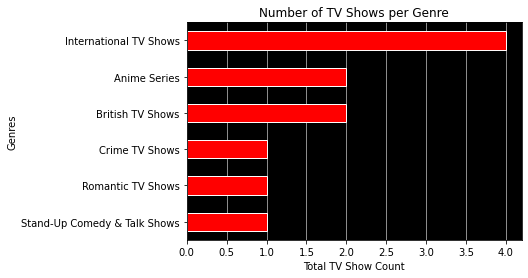

In [41]:
# OPTION FIRST

# Pull out the list of genres
tvshow_genres_index_list = tvshow_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
tvshow_genres_value_list = tvshow_df['listed_in'].value_counts().tolist()



genres_dict = {}
for genres in tvshow_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1
# genres_dict
# for (key, value) in genres_dict.items():
#     genres_dict[key] = [value]
    
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# # TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', color='red', edgecolor='snow', legend=None)

plt.title("Number of TV Shows per Genre")
plt.xlabel("Total TV Show Count")
plt.ylabel("Genres")
plt.grid(axis = 'x')
plt.show()

In [136]:
# LEAVE IT
# Extract only year from date_added 
main_data_cleaned["added_year"]= main_data_cleaned["date_added"].str.split(",").str[1]
main_data_cleaned

# df['year'] =drop_columns_main_data['date_added'].dt.year
# df['V'] = df['V'].str.split('-').str[0]

main_data_cleaned['listed_in'].value_counts()[main_data_cleaned['listed_in'].value_counts() != 1]

NameError: name 'main_data_cleaned' is not defined

In [77]:
# LEAVE IT
main_data_cleaned['country'].value_counts()

NameError: name 'main_data_cleaned' is not defined